In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [29]:
models = ['Llama-2', 'Falcon', 'BLOOM', 'T5', 'BART', 'DeepSeek', 'Mistral']
criteria = ['Perplexity', 'BLEU Score', 'Inference Time', 'Model Size', 'Training Data']
weights = np.array([0.3, 0.2, 0.2, 0.15, 0.15])
beneficial = [False, True, False, False, True]

In [30]:
data = np.array([
    [12, 0.80, 1.0, 130, 400],
    [15, 0.78, 0.9, 90, 350],
    [18, 0.75, 1.5, 180, 550],
    [14, 0.82, 0.8, 110, 370],
    [16, 0.79, 1.1, 140, 420],
    [13, 0.83, 0.95, 120, 390],
    [11, 0.84, 1.05, 125, 410]
])

data

array([[ 12.  ,   0.8 ,   1.  , 130.  , 400.  ],
       [ 15.  ,   0.78,   0.9 ,  90.  , 350.  ],
       [ 18.  ,   0.75,   1.5 , 180.  , 550.  ],
       [ 14.  ,   0.82,   0.8 , 110.  , 370.  ],
       [ 16.  ,   0.79,   1.1 , 140.  , 420.  ],
       [ 13.  ,   0.83,   0.95, 120.  , 390.  ],
       [ 11.  ,   0.84,   1.05, 125.  , 410.  ]])

In [31]:
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(data)

print(norm_data)

[[0.14285714 0.55555556 0.28571429 0.44444444 0.25      ]
 [0.57142857 0.33333333 0.14285714 0.         0.        ]
 [1.         0.         1.         1.         1.        ]
 [0.42857143 0.77777778 0.         0.22222222 0.1       ]
 [0.71428571 0.44444444 0.42857143 0.55555556 0.35      ]
 [0.28571429 0.88888889 0.21428571 0.33333333 0.2       ]
 [0.         1.         0.35714286 0.38888889 0.3       ]]


In [32]:
for i in range(len(criteria)):
    if not beneficial[i]:
        norm_data[:, i] = 1 - norm_data[:, i]

In [33]:
weighted_matrix = norm_data * weights
print(weighted_matrix)

[[2.57142857e-01 1.11111111e-01 1.42857143e-01 8.33333333e-02
  3.75000000e-02]
 [1.28571429e-01 6.66666667e-02 1.71428571e-01 1.50000000e-01
  0.00000000e+00]
 [6.66133815e-17 0.00000000e+00 4.44089210e-17 0.00000000e+00
  1.50000000e-01]
 [1.71428571e-01 1.55555556e-01 2.00000000e-01 1.16666667e-01
  1.50000000e-02]
 [8.57142857e-02 8.88888889e-02 1.14285714e-01 6.66666667e-02
  5.25000000e-02]
 [2.14285714e-01 1.77777778e-01 1.57142857e-01 1.00000000e-01
  3.00000000e-02]
 [3.00000000e-01 2.00000000e-01 1.28571429e-01 9.16666667e-02
  4.50000000e-02]]


In [34]:
ideal_best = np.max(weighted_matrix, axis=0)
ideal_worst = np.min(weighted_matrix, axis=0)
print(ideal_best)
print(ideal_worst)

[0.3  0.2  0.2  0.15 0.15]
[6.66133815e-17 0.00000000e+00 4.44089210e-17 0.00000000e+00
 0.00000000e+00]


In [35]:
distance_best = np.sqrt(np.sum((weighted_matrix - ideal_best) ** 2, axis=1))
distance_worst = np.sqrt(np.sum((weighted_matrix - ideal_worst) ** 2, axis=1))

print(distance_best)
print(distance_worst)

[0.17350496 0.2654842  0.43874822 0.19453029 0.2864641  0.16302607
 0.13974913]
[0.32745532 0.26993112 0.15       0.32775204 0.18844122 0.33632898
 0.39617974]


In [36]:
topsis_score = distance_worst / (distance_best + distance_worst)
topsis_score

array([0.65365526, 0.50415278, 0.25477784, 0.62753806, 0.39679745,
       0.67352674, 0.73923941])

In [37]:
ranking = np.argsort(topsis_score)[::-1]
ranked_models = [models[i] for i in ranking]
ranked_scores = topsis_score[ranking]

ranked_models

['Mistral', 'DeepSeek', 'Llama-2', 'T5', 'Falcon', 'BART', 'BLOOM']

In [38]:
result_df = pd.DataFrame({'Model': ranked_models, 'TOPSIS Score': ranked_scores, 'Rank': range(1, len(models) + 1)})
print(result_df)

      Model  TOPSIS Score  Rank
0   Mistral      0.739239     1
1  DeepSeek      0.673527     2
2   Llama-2      0.653655     3
3        T5      0.627538     4
4    Falcon      0.504153     5
5      BART      0.396797     6
6     BLOOM      0.254778     7


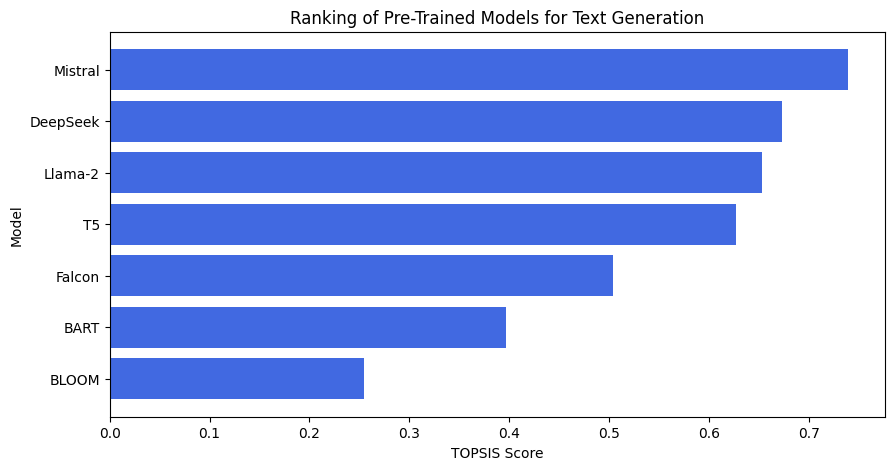

In [39]:
plt.figure(figsize=(10, 5))
plt.barh(result_df['Model'], result_df['TOPSIS Score'], color='royalblue')
plt.xlabel('TOPSIS Score')
plt.ylabel('Model')
plt.title('Ranking of Pre-Trained Models for Text Generation')
plt.gca().invert_yaxis()
plt.show()